# 1. Importance given to clean energy

In this Notebook,We going to explore about Powerplants 

* Number of commissioned powerplants per country
* Which type of powerplant contribute more to their electricity production?
* Visualisation- Location of Powerplant,etc

This Notebook is a part of [the course](http://zerotopandas.com) Assignment, where you can learn about Python basics, Numpy, Pandas, Matplotlib and Seaborn.



## 1.1. Dataset Details

The Global Power Plant Database is an open-source open-access dataset of grid-scale (1 MW and greater) electricity generating facilities operating across the world. The Database currently contains nearly 30000 power plants in 164 countries, representing about 82% of the world's capacity.

* Title: Global Power Plant Database
* Description: A comprehensive, global, open source database of power plants
* Version: 1.2.0
* Release Date: 2019-06-12
* URL: http://datasets.wri.org/dataset/globalpowerplantdatabase
* Copyright: Copyright 2018-2019 World Resources Institute and Data Contributors
* License: Creative Commons Attribution 4.0 International -- CC BY 4.0
* Contact: powerexplorer@wri.org
* Citation: Global Energy Observatory, Google, KTH Royal Institute of Technology in Stockholm, Enipedia, World Resources Institute. 2019. Global Power Plant Database. Published on Resource Watch and Google Earth Engine. http://resourcewatch.org/ https://earthengine.google.com/  



### 1.1.1. Column Description

* country(text): Country Code
* country_long : Country Name
* name : name or title of the power plant
* gppd_idnr : 10 or 12 character identifier for the power plant
* capacity_mw : electrical generating capacity in megawatts
* latitude : geolocation in decimal degrees; WGS84 (EPSG:4326)
* longitude : geolocation in decimal degrees; WGS84 (EPSG:4326)
* primary_fuel: energy source used in primary electricity generation or export
* other_fuel1: energy source used in electricity generation or export
* other_fuel2: energy source used in electricity generation or export
* other_fuel3: energy source used in electricity generation or export
* commissioning_year: year of plant operation, weighted by unit-capacity when data is available
* owner: majority shareholder of the power plant, generally in Romanized form
* source: entity reporting the data; could be an organization, report, or document, generally in Romanized form
* url: web document corresponding to the `source` field
* geolocation_source: attribution for geolocation information
* wepp_id: a reference to a unique plant identifier in the widely-used PLATTS-WEPP datase
* year_of_capacity_data: year the capacity information was reported
* generation_gwh_2013: electricity generation in gigawatt-hours reported for the year 2013 
* generation_gwh_2014: electricity generation in gigawatt-hours reported for the year 2014
* generation_gwh_2015: electricity generation in gigawatt-hours reported for the year 2015 
* generation_gwh_2016: electricity generation in gigawatt-hours reported for the year 2016
* generation_gwh_2017: electricity generation in gigawatt-hours reported for the year 2017
* estimated_generation_gwh: estimated annual electricity generation in gigawatt-hours for the year 2014


## 1.2. What is Powerplant?

Powerplant is the place where electricity is generated. There are different types of Powerplant based on the fuel it uses to generate electricity.For [more details](https://en.wikipedia.org/wiki/Power_station)

## 2. Data Preparation and Cleaning

* Loading the Dataset
* Shape of Dataset
* Checking for Null Values
* Datatypes of each column
* 5 summary statistics


In [1]:
# importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Alter display to Maximum 
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
# reading the data
dataframe=pd.read_csv('../input/power-plant-database/global_power_plant_database.csv')
dataframe.sample(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
3082,BRA,Brazil,Tambaqui,BRA0029276,93.046,-3.0980,-60.0155,Oil,NaN,NaN,NaN,2006.0,NaN,Agência Nacional de Energia Elétrica (Brazil),http://www2.aneel.gov.br/aplicacoes/capacidade...,Agência Nacional de Energia Elétrica (Brazil),1069269,2017.0,NaN,NaN,NaN,NaN,NaN,397.993130
6658,CHN,China,Meixin captive power station,WRI1075679,700.000,34.9653,108.9758,Coal,NaN,NaN,NaN,2017.0,Meixin Industry Investment Co.,GCPT,https://endcoal.org/global-coal-plant-tracker/,GCPT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3014.121843
8308,CZE,Czech Republic,Simirice Solar Power Plant,WRI1029711,6.100,50.2965,15.8455,Solar,NaN,NaN,NaN,NaN,Phono Solar Technology Co Ltd,Phono Solar,http://www.phonosolar.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29880,VNM,Vietnam,Vinh Son 5,WRI1030836,28.000,14.3611,108.7203,Hydro,NaN,NaN,NaN,2014.0,Vinh Son Hydropower Investment JSC,Open Development Vietnam,https://data.opendevelopmentmekong.net/vi/libr...,Open Development Vietnam,1099920,NaN,NaN,NaN,NaN,103.000,NaN,97.864071
25871,USA,United States of America,Monument,USA0002851,13.500,39.7667,-84.1739,Oil,NaN,NaN,NaN,1968.0,Dayton Power & Light Co,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,18122,2017.0,0.098,0.104,0.053,0.108,0.035,NaN


In [4]:
dataframe.shape

(29910, 24)

In [5]:
dataframe.isna().sum()

country                         0
country_long                    0
name                            0
gppd_idnr                       0
capacity_mw                     0
latitude                        0
longitude                       0
primary_fuel                    0
other_fuel1                 27947
other_fuel2                 29607
other_fuel3                 29806
commissioning_year          13607
owner                       10379
source                         15
url                            18
geolocation_source            419
wepp_id                     13529
year_of_capacity_data       16167
generation_gwh_2013         22914
generation_gwh_2014         22470
generation_gwh_2015         21766
generation_gwh_2016         20939
generation_gwh_2017         20697
estimated_generation_gwh     8119
dtype: int64

In [6]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,29910.0,186.294810,525.703572,1.0000,4.774430,18.900000,100.000000,22500.00000
latitude,29910.0,32.497558,23.654472,-77.8470,28.863475,40.071250,47.134575,71.29200
longitude,29910.0,-12.458680,76.978265,-179.9777,-79.211275,-3.746700,24.931050,179.38870
commissioning_year,16303.0,1995.486227,23.525537,1896.0000,1986.000000,2005.000000,2012.063866,2018.00000
year_of_capacity_data,13743.0,2016.860001,1.195205,2000.0000,2017.000000,2017.000000,2017.000000,2018.00000
generation_gwh_2013,6996.0,689.625437,2330.869715,-947.6000,2.167000,27.033000,250.600500,50834.00000
generation_gwh_2014,7440.0,664.840134,2258.351290,-989.6190,2.157000,23.005000,224.955250,32320.91700
generation_gwh_2015,8144.0,664.270784,2304.225386,-864.4280,2.350250,22.094000,238.437917,59546.86500
generation_gwh_2016,8971.0,583.622877,2097.603620,-768.6200,2.380500,17.862000,187.084835,32377.47700
generation_gwh_2017,9213.0,579.524723,2063.070235,-934.9440,3.202000,20.462000,192.567000,35116.00000


In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29910 entries, 0 to 29909
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   29910 non-null  object 
 1   country_long              29910 non-null  object 
 2   name                      29910 non-null  object 
 3   gppd_idnr                 29910 non-null  object 
 4   capacity_mw               29910 non-null  float64
 5   latitude                  29910 non-null  float64
 6   longitude                 29910 non-null  float64
 7   primary_fuel              29910 non-null  object 
 8   other_fuel1               1963 non-null   object 
 9   other_fuel2               303 non-null    object 
 10  other_fuel3               104 non-null    object 
 11  commissioning_year        16303 non-null  float64
 12  owner                     19531 non-null  object 
 13  source                    29895 non-null  object 
 14  url   

### Observations 1:

1. Number of Powerplants: 29910
2. In 'commissioning_year'column some values after '.' eg.1985.336842. We need to alter the column.
3. 'generation_gwh_2013' , 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017' these column have minimum value in negative. It is not possible so further investigation need to be done  and gap between the 75% percentile and 100% percentile is high.

In [8]:
# Converting to Int64 to get rid of values after point
dataframe['commissioning_year']=dataframe['commissioning_year'].fillna(0).astype('int64')
# creating new Dataframe with only required values
df=dataframe.drop(['owner','source','url','geolocation_source','year_of_capacity_data'],axis=1)

In [9]:
df.sample(10)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,wepp_id,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
14682,PRK,North Korea,Hongnam Fertilizer,WRI1019834,18.0,39.8402,127.6341,Coal,NaN,NaN,NaN,0,1056459,NaN,NaN,NaN,NaN,NaN,14.398667
10141,FRA,France,Peyrissac,WRI1025613,1.2,45.5060,1.6949,Hydro,NaN,NaN,NaN,0,1014984,NaN,NaN,NaN,NaN,NaN,4.221887
21438,USA,United States of America,Beardslee,USA0002543,20.0,43.0191,-74.7413,Hydro,NaN,NaN,NaN,1924,27788,48.3150,51.3910,41.4900,44.9970,60.9320,NaN
10830,FRA,France,Épizon,WRI1023936,80.0,48.3735,5.3222,Wind,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,152.264817
22468,USA,United States of America,Colebrook Hydroelectric,USA0054301,3.0,42.0078,-73.0356,Hydro,NaN,NaN,NaN,1988,26104,4.5200,5.7040,4.9410,2.3830,3.9910,NaN
20511,GBR,United Kingdom,Swindon Sewerage Treatment Works,GBR0006489,1.2,51.5679,-1.8085,Biomass,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,20.846854
29700,VNM,Vietnam,Da Nhim,WRI1030790,160.0,11.8529,108.6058,Hydro,NaN,NaN,NaN,1964,1025674,NaN,NaN,NaN,1000.0000,NaN,559.223264
22708,USA,United States of America,Crystal Mountain,USA0003853,2.7,46.9535,-121.4752,Oil,NaN,NaN,NaN,1970,30959,0.0560,0.3580,0.2940,0.1960,0.3960,NaN
24911,USA,United States of America,King Mill,USA0061000,2.2,33.4852,-81.9912,Hydro,NaN,NaN,NaN,1944,NaN,NaN,NaN,NaN,5.1660,4.7860,100.524998
27848,USA,United States of America,Sithe Independence Station,USA0054547,1086.1,43.4950,-76.4511,Gas,NaN,NaN,NaN,1994,32755,5215.6832,5996.3635,6451.9308,4748.2519,4294.1677,NaN


## 3. Exploratory Analysis and Visualization



In [10]:
for col in df.columns:
    print('Number of unique value in the ',col,'is ',df[col].nunique())

Number of unique value in the  country is  164
Number of unique value in the  country_long is  164
Number of unique value in the  name is  29538
Number of unique value in the  gppd_idnr is  29910
Number of unique value in the  capacity_mw is  5558
Number of unique value in the  latitude is  27606
Number of unique value in the  longitude is  28427
Number of unique value in the  primary_fuel is  15
Number of unique value in the  other_fuel1 is  12
Number of unique value in the  other_fuel2 is  11
Number of unique value in the  other_fuel3 is  7
Number of unique value in the  commissioning_year is  122
Number of unique value in the  wepp_id is  15399
Number of unique value in the  generation_gwh_2013 is  5970
Number of unique value in the  generation_gwh_2014 is  6310
Number of unique value in the  generation_gwh_2015 is  6906
Number of unique value in the  generation_gwh_2016 is  7439
Number of unique value in the  generation_gwh_2017 is  8122
Number of unique value in the  estimated_gen

In [11]:
com_year=pd.DataFrame(df['commissioning_year'].value_counts(ascending=True))
com_year=com_year.drop(0,axis=0)
com_year.head(5)

,commissioning_year
1896,1
1899,1
1901,2
1904,3
1902,4
1900,6
1903,6
1906,7
1908,9
1911,9


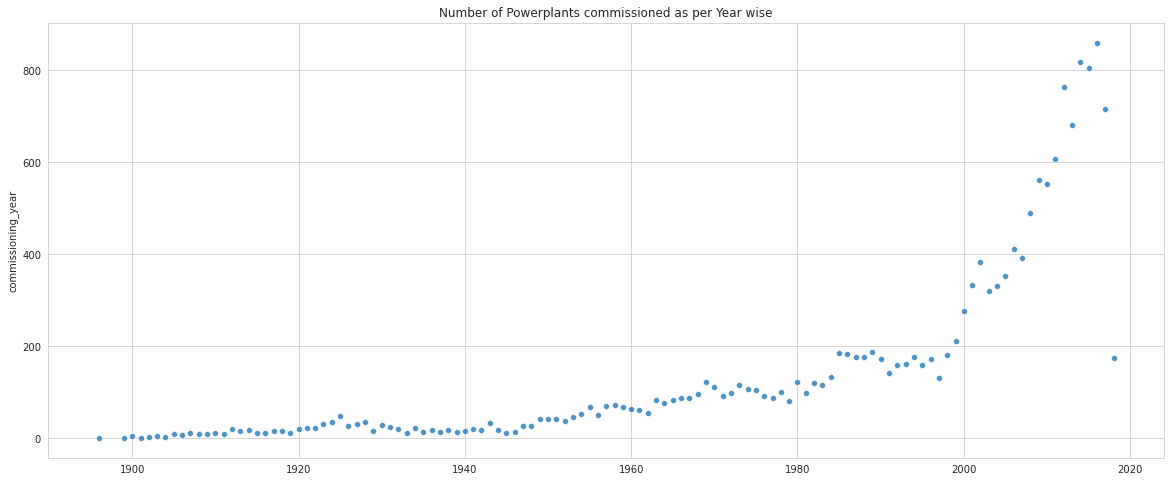

In [12]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
plt.title('Number of Powerplants commissioned as per Year wise')
sns.scatterplot(com_year.index,com_year.commissioning_year,alpha=0.8)

In [13]:
pf_list=pd.DataFrame(df['primary_fuel'].value_counts())
of1_list=pd.DataFrame(df['other_fuel1'].value_counts())
of2_list=pd.DataFrame(df['other_fuel2'].value_counts())
of3_list=pd.DataFrame(df['other_fuel3'].value_counts())

pp_fuel=pd.concat([pf_list,of1_list,of2_list,of3_list],axis=1)
pp_fuel=pp_fuel.fillna(0)
pp_fuel['total']=pp_fuel['primary_fuel']+pp_fuel['other_fuel1']+pp_fuel['other_fuel2']+pp_fuel['other_fuel3']
pp_fuel

,primary_fuel,other_fuel1,other_fuel2,other_fuel3,total
Hydro,7155,24.0,6.0,6.0,7191.0
Solar,5929,22.0,15.0,5.0,5971.0
Wind,5188,6.0,4.0,2.0,5200.0
Gas,3922,376.0,111.0,38.0,4447.0
Coal,2390,85.0,6.0,0.0,2481.0
Oil,2290,1210.0,73.0,15.0,3588.0
Biomass,1396,44.0,24.0,14.0,1478.0
Waste,1087,105.0,20.0,0.0,1212.0
Nuclear,198,0.0,0.0,0.0,198.0
Geothermal,189,0.0,0.0,0.0,189.0


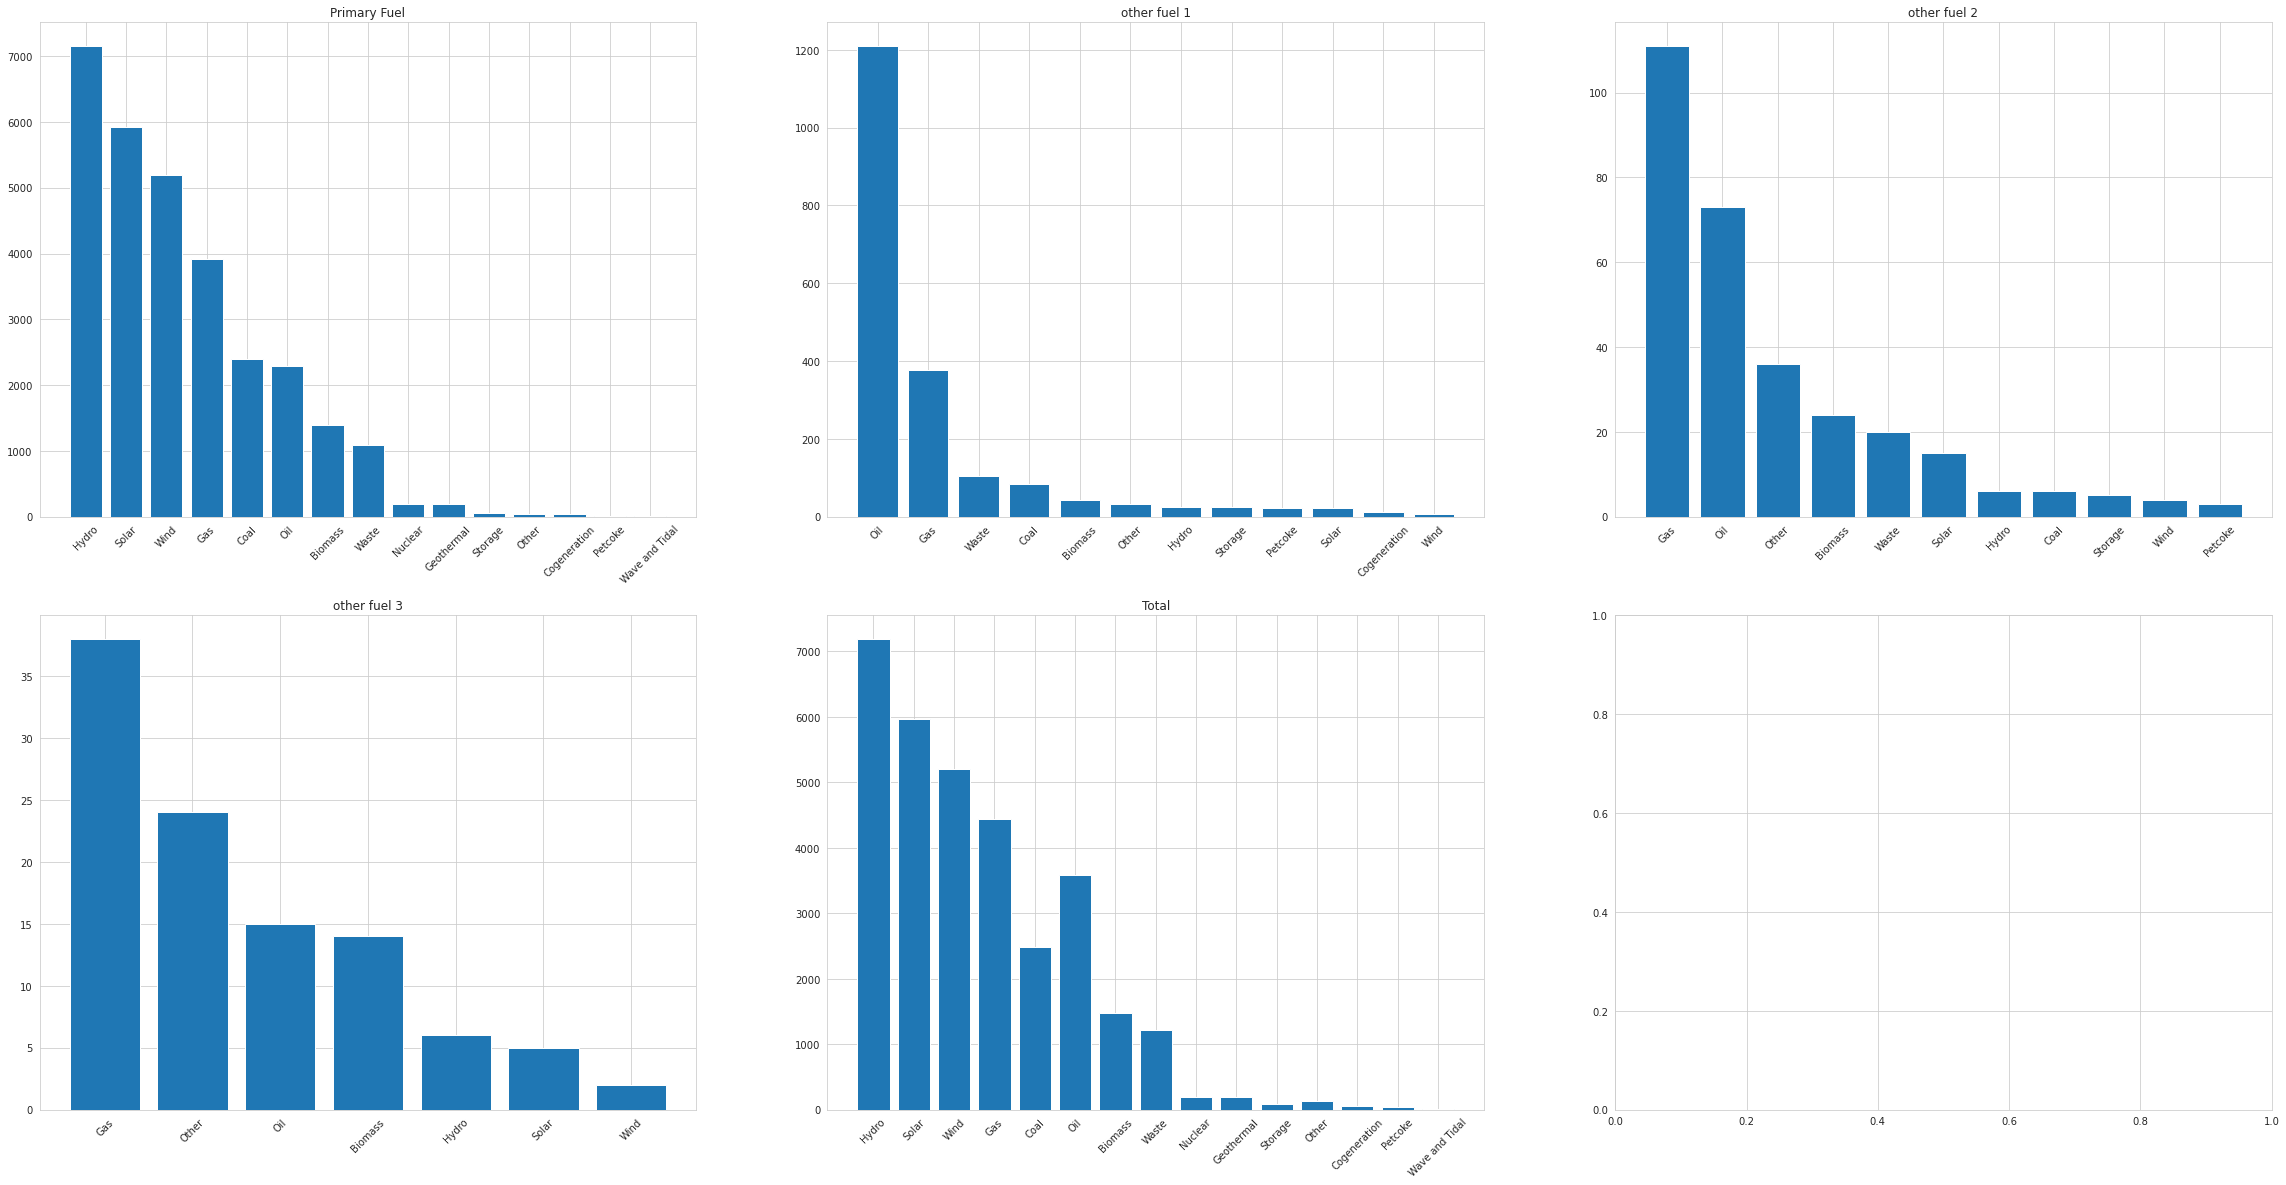

In [14]:
fig,axes=plt.subplots(2,3,figsize=(40,20))

axes[0,0].set_title('Primary Fuel')
axes[0,0].bar(pf_list.index,pf_list.primary_fuel)
axes[0,0].tick_params(axis='x', labelrotation=45)

axes[0,1].set_title('other fuel 1')
axes[0,1].bar(of1_list.index,of1_list.other_fuel1)
axes[0,1].tick_params(axis='x', labelrotation=45)

axes[0,2].set_title('other fuel 2')
axes[0,2].bar(of2_list.index,of2_list.other_fuel2)
axes[0,2].tick_params(axis='x', labelrotation=45)

axes[1,0].set_title('other fuel 3')
axes[1,0].bar(of3_list.index,of3_list.other_fuel3)
axes[1,0].tick_params(axis='x', labelrotation=45)

axes[1,1].set_title('Total')
axes[1,1].bar(pp_fuel.index,pp_fuel.total)
axes[1,1].tick_params(axis='x', labelrotation=45)
plt.show()


In [15]:
df.generation_gwh_2014=df.generation_gwh_2014.fillna(0)
min(df.generation_gwh_2014)

-989.6189999999999

In [16]:
df[(df.generation_gwh_2014<0)&(df.generation_gwh_2015<0)&(df.generation_gwh_2016<0)&(df.generation_gwh_2017<0)].head(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,wepp_id,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
20976,USA,United States of America,Airport Industrial,USA0007995,10.0,38.2844,-104.5308,Oil,NaN,NaN,NaN,2002,NaN,-0.165,-0.162,-0.203,-0.209,-0.149,NaN
21275,USA,United States of America,Augusta Electric Plant No 1,USA0001261,11.5,37.6785,-96.9719,Gas,Oil,NaN,NaN,1965,NaN,-0.290,-0.258,-0.218,-0.239,-0.213,NaN
21276,USA,United States of America,Augusta Electric Plant No 2,USA0006791,20.7,37.6861,-96.9650,Gas,Oil,NaN,NaN,1983,NaN,-0.869,-0.569,-0.620,-0.276,-0.795,NaN
21333,USA,United States of America,Bad Creek,USA0007125,1296.0,35.0075,-82.9975,Hydro,NaN,NaN,NaN,1991,18699,-449.973,-493.746,-531.676,-572.652,-623.387,NaN
21397,USA,United States of America,Bath County,USA0006167,2862.0,38.2089,-79.8000,Hydro,NaN,NaN,NaN,1986,36089,-947.600,-989.619,-864.428,-768.620,-934.944,NaN


# 1. How many Powerplants are commissioned after 2009?

In [17]:
df1=df[df['commissioning_year']>2009]
print('After 2009, {} Powerplants are comissioned across the world.'.format(df.shape[0]))

After 2009, 29910 Powerplants are comissioned across the world.


# 2. Which type of Powerplant is Commisioned most after 2009?

              primary_fuel
Solar                 2440
Wind                  1163
Coal                   557
Hydro                  516
Gas                    444
Oil                    369
Waste                  199
Biomass                192
Storage                 54
Geothermal              27
Other                    7
Cogeneration             6
Nuclear                  4


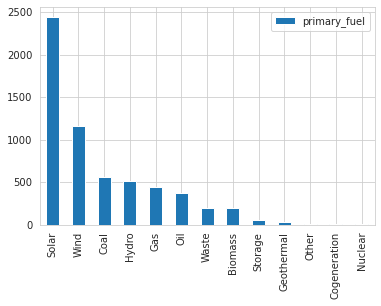

In [18]:
pp_2009=pd.DataFrame(df1.primary_fuel.value_counts())
print(pp_2009)
pp_2009.plot(kind='bar')

2440 solar powwerplants are commissioned after 2009. But we will explore further how much electricity they are generating.

# 3. Among those plant, Which type of commissioned powerplant produces most Electricity?

In [19]:
pp_2010=pd.DataFrame(df1.groupby('primary_fuel')['capacity_mw'].sum().sort_values(ascending=False))

pp_2010_sum=pp_2010['capacity_mw'].sum()
pp_2010['percentage']=pp_2010['capacity_mw']/pp_2010_sum*100
pp_2010

,capacity_mw,percentage
primary_fuel,,
Coal,526293.33700,52.515717
Gas,174425.75566,17.404920
Hydro,127731.39253,12.745565
Wind,80099.59200,7.992667
Oil,42846.97255,4.275447
Solar,33560.80363,3.348835
Biomass,6967.79500,0.695275
Nuclear,5745.00000,0.573260
Waste,2047.22600,0.204281


* Though the number of commissioned solar powerplants are high. the commissioned capacity is only 33.5 GW. 
* But Commissioned Capacity of Coal Powerplant is 526 GW. It is really a bad news because Coal and Oil based Powerplant produce toxic pollutants.

# 4. From 2002 to 2009, Which type of commissioned powerplant produces most Electricity?

In [20]:
df2=df[(df['commissioning_year']>2002)&(df['commissioning_year']<2010)]
print('Number of Powerplants commissioned from 2002 to 2010 are',df2.shape[0],'.')

pp_2002=pd.DataFrame(df2.groupby('primary_fuel')['capacity_mw'].sum().sort_values(ascending=False))
pp_2002_sum=pp_2002['capacity_mw'].sum()
pp_2002['percentage']=pp_2002['capacity_mw']/pp_2002_sum*100

pp_2002

Number of Powerplants commissioned from 2002 to 2010 are 2862 .


,capacity_mw,percentage
primary_fuel,,
Coal,427328.05400,51.144824
Gas,255505.46070,30.580211
Hydro,83058.12900,9.940825
Wind,42317.04900,5.064723
Oil,15864.93567,1.898797
Biomass,4382.16500,0.524480
Nuclear,3419.80000,0.409299
Waste,1862.19400,0.222877
Geothermal,867.80000,0.103863


* In previous 8 year period(2002-2009), Commissioned capacity of Coal based powerplant is 427 GW.
* Commissioned capacity of Solar based powerplant is 0.518 GW.

In [21]:
merge=pp_2010.join(pp_2002,lsuffix='_2018', rsuffix='_2009')
merge['%_inc']=(merge['capacity_mw_2018']-merge['capacity_mw_2009'])/merge['capacity_mw_2009']
merge

,capacity_mw_2018,percentage_2018,capacity_mw_2009,percentage_2009,%_inc
primary_fuel,,,,,
Coal,526293.33700,52.515717,427328.05400,51.144824,0.231591
Gas,174425.75566,17.404920,255505.46070,30.580211,-0.317331
Hydro,127731.39253,12.745565,83058.12900,9.940825,0.537855
Wind,80099.59200,7.992667,42317.04900,5.064723,0.892844
Oil,42846.97255,4.275447,15864.93567,1.898797,1.700734
Solar,33560.80363,3.348835,518.32000,0.062035,63.749197
Biomass,6967.79500,0.695275,4382.16500,0.524480,0.590035
Nuclear,5745.00000,0.573260,3419.80000,0.409299,0.679923
Waste,2047.22600,0.204281,1862.19400,0.222877,0.099362


* The Commissioned Solar Powerplant capcity from 2010 to 2018 is increased by 60% than previous 8 year period. It is clear sign that world is giving importance to solar powerplant.

# 5. Top 5 countries leading in commissioning of SolarPowerplants

In [22]:
df1[df1['primary_fuel']=='Solar'].groupby(by='country_long')['capacity_mw'].sum().sort_values(ascending=False).head(5)

country_long
United States of America    26740.250
Spain                        1821.993
South Africa                 1537.040
Philippines                   686.200
Morocco                       510.000
Name: capacity_mw, dtype: float64

* USA commissioned 26GW solar powerplant in period 2010-2018.

# 6. Locate the Powerplant commissioned after 2009 on Map.

<Figure size 3096x1152 with 0 Axes>

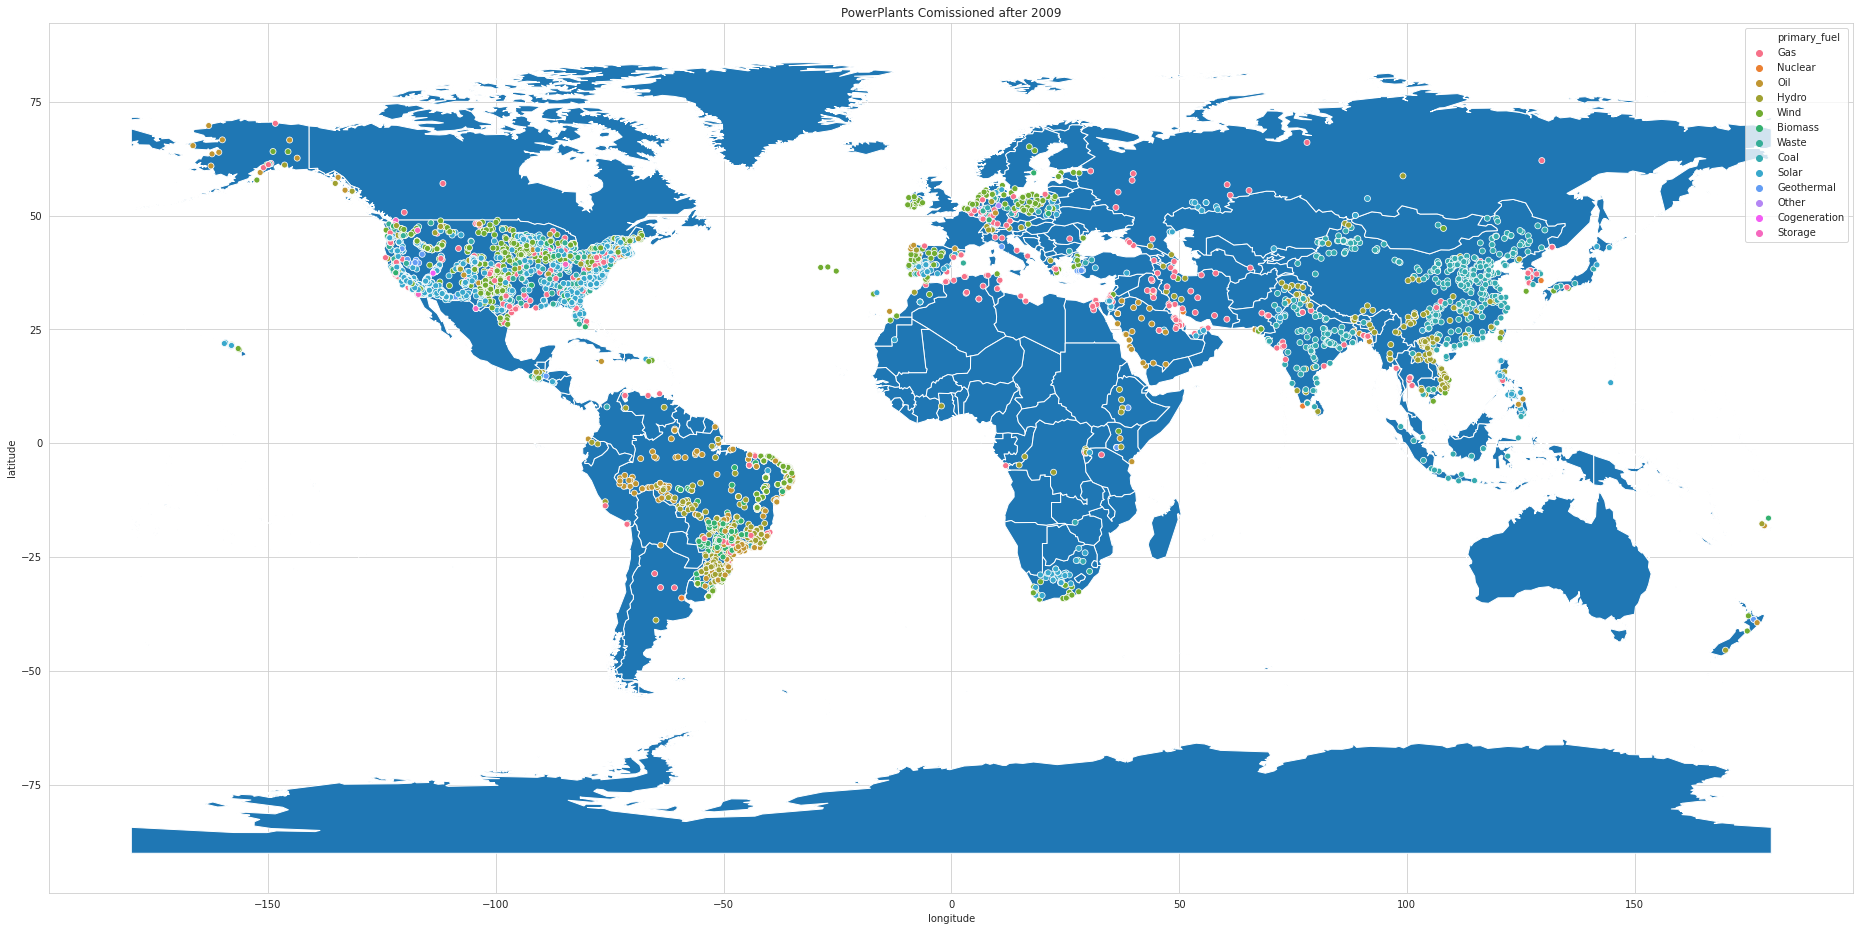

In [23]:
import geopandas as gpd
shapefile = '../input/world-shapefile/world_shapefile.shp'
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)

plt.figure(figsize=(43,16))
gdf.plot(figsize=(43,16))
sns.scatterplot(df1['longitude'],df1['latitude'],hue=df1['primary_fuel'])
plt.title('PowerPlants Comissioned after 2009')
plt.show()

In [24]:
brazil_2009=df1[df1['country_long']=='Brazil']
brazil_2009.head(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,wepp_id,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
1048,BRA,Brazil,AJ Rorato,BRA0031076,2.1900,-23.9277,-52.4869,Oil,NaN,NaN,NaN,2012,NaN,NaN,0.0,NaN,NaN,NaN,9.367463
1049,BRA,Brazil,ALLIANZ PARQUE,BRA0032153,3.8744,-23.5218,-46.6691,Oil,NaN,NaN,NaN,2014,NaN,NaN,0.0,NaN,NaN,NaN,16.572282
1051,BRA,Brazil,ANHANGUERA EDUCACIONAL SA - CAMPO GRANDE,BRA0032667,2.1600,-20.4633,-54.5918,Oil,NaN,NaN,NaN,2013,NaN,NaN,0.0,NaN,NaN,NaN,9.239142
1052,BRA,Brazil,AREVALE,BRA0032860,2.0000,-22.8877,-45.3275,Biomass,NaN,NaN,NaN,2014,NaN,NaN,0.0,NaN,NaN,NaN,7.162047
1056,BRA,Brazil,Abranjo I,BRA0030400,4.8600,-30.7944,-52.6272,Hydro,NaN,NaN,NaN,2014,1093196,NaN,0.0,NaN,NaN,NaN,18.512086


# 7. Locate the Powerplant commissioned in Brazil after 2009.

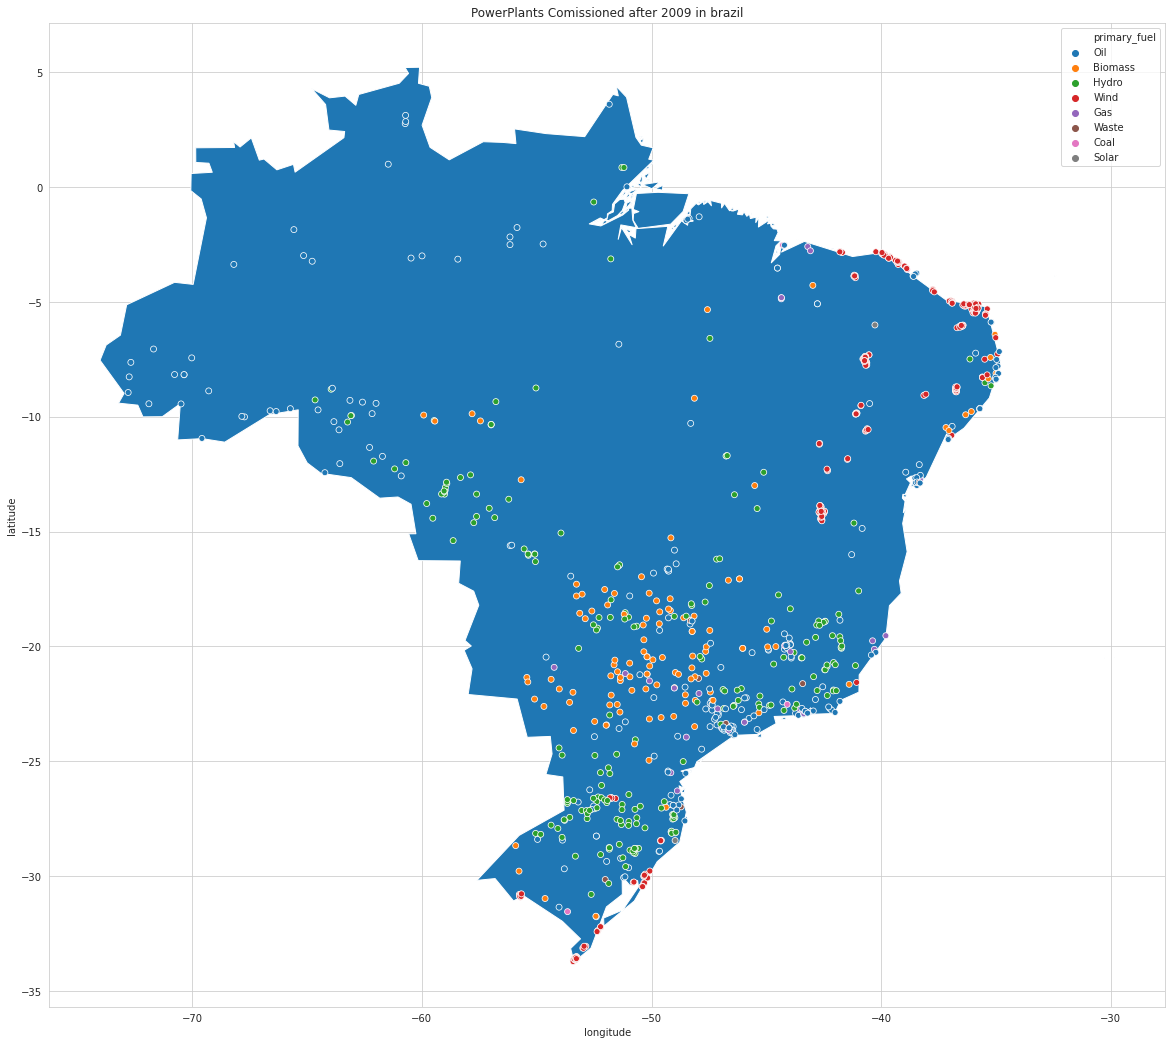

In [25]:
brazil_shape=gdf[gdf['NAME']=='Brazil']['geometry']
brazil=gdf[gdf['NAME']=='Brazil']
brazil.plot(figsize=(20,20))
sns.scatterplot(brazil_2009['longitude'],brazil_2009['latitude'],hue=brazil_2009['primary_fuel'])
plt.title('PowerPlants Comissioned after 2009 in brazil')
plt.show()

# Conclusion

In recent years, Importance given to clean energy(solar,hydro,wind,etc) is increased a lot. But the commissioned capacity of solar,wind and hydro is 3.35%,8% and 12.7% of total commissioned powerplant capacity. There is a lot of room to increase the contribution of clean energy. 